# Code is taken from https://www.kaggle.com/fedi1996/house-prices-data-cleaning-viz-and-modeling

In [45]:
# Import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing **train** and **test** datasets

In [2]:
sample_submission = pd.read_csv("../data/sample_submission.csv")
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")
#Creating a copy of the train and test datasets
c_test  = test.copy()
c_train  = train.copy()

# Getting information about train dataset

In [3]:
c_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
c_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

We have 81 columns.

Our target variable is SalePrice.
Id is just an index that we can drop but we will need it in the final submission.
We have many missing values </font>
we have 79 features in our dataset.

In [5]:
# Concat Train and Test datasets

In [6]:
c_train['train']  = 1
c_test['train']  = 0
df = pd.concat([c_train, c_test], axis=0,sort=False)

# Data preprocessing

## Calculating the percentage of missing values of each feature

In [7]:
#Percentage of NAN Values 
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

In [8]:
#Features with more than 50% of missing values.
NAN = NAN[NAN.percentage > 50]
NAN.sort_values("percentage", ascending=False)

column_name  percentage
72       PoolQC   99.657417
74  MiscFeature   96.402878
6         Alley   93.216855
73        Fence   80.438506

### We can drop PoolQC, MiscFeature, Alley and Fence features because they have more than 80% of missing values.

In [9]:
#Drop PoolQC, MiscFeature, Alley and Fence features
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

Now we will select numerical and categorical features

In [10]:
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

Categorical Features :

In [11]:
object_columns_df.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

Numerical Features :

In [12]:
numerical_columns_df.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
train              int64
dtype: object

In [13]:
# Dealing with categorical feature
#Number of null values in each feature
null_counts = object_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


### We will fill -- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageFinish, GarageQual, FireplaceQu, GarageCond** -- with "None" (Take a look in the data description).
### We will fill the rest of features with th most frequent value (using its own most frequent value).

In [14]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns_df[columns_None]= object_columns_df[columns_None].fillna('None')

/Users/ctsang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
#fill missing values for each column (using its own most frequent value)
object_columns_df[columns_with_lowNA] = object_columns_df[columns_with_lowNA].fillna(object_columns_df.mode().iloc[0])

### Now we have a clean categorical features
### In the next step we will deal with the **numerical** features

In [16]:
#Number of null values in each feature
null_counts = numerical_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64


### Fill GarageYrBlt and LotFrontage
### Fill the rest of columns with 0

In [17]:
print((numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt']).median())
print(numerical_columns_df["LotFrontage"].median())

35.0
68.0


### So we will fill the year with 1979 and the Lot frontage with 68

In [18]:
numerical_columns_df['GarageYrBlt'] = numerical_columns_df['GarageYrBlt'].fillna(numerical_columns_df['YrSold']-35)
numerical_columns_df['LotFrontage'] = numerical_columns_df['LotFrontage'].fillna(68)

/Users/ctsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ctsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Fill the rest of columns with 0

In [19]:
numerical_columns_df= numerical_columns_df.fillna(0)

### We finally end up with a clean dataset
### After making some plots we found that we have some colums with low variance so we decide to delete them

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

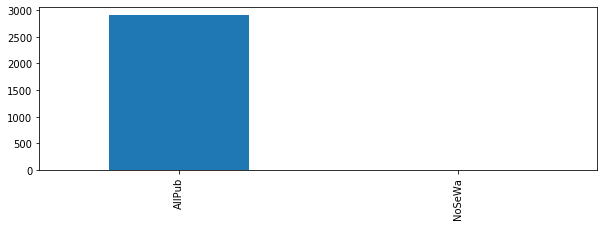

In [20]:
object_columns_df['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Utilities'].value_counts() 

Pave    2907
Grvl      12
Name: Street, dtype: int64

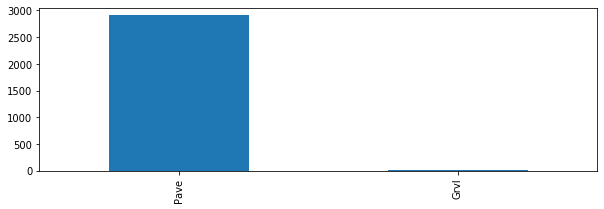

In [21]:
object_columns_df['Street'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Street'].value_counts() 

Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

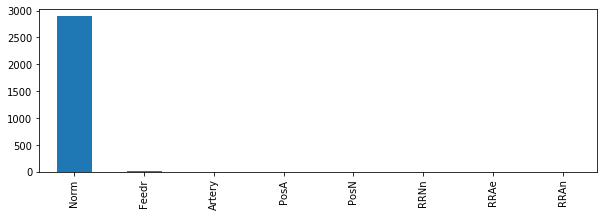

In [22]:
object_columns_df['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Condition2'].value_counts() 

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

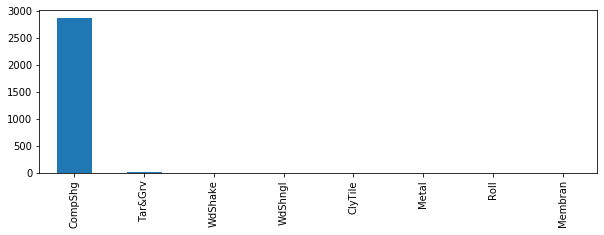

In [23]:
object_columns_df['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['RoofMatl'].value_counts() 

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

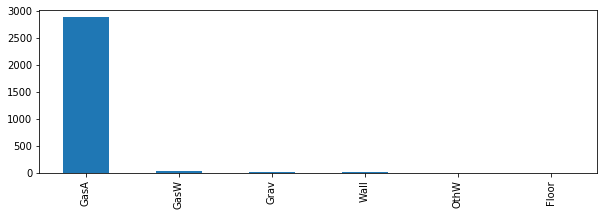

In [24]:
object_columns_df['Heating'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Heating'].value_counts() #======> Drop feature one Type

In [25]:
object_columns_df = object_columns_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

### Now the next step is to encode categorical features
### Ordinal categories features - Mapping from 0 to N

In [26]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_df['ExterQual'] = object_columns_df['ExterQual'].map(bin_map)
object_columns_df['ExterCond'] = object_columns_df['ExterCond'].map(bin_map)
object_columns_df['BsmtCond'] = object_columns_df['BsmtCond'].map(bin_map)
object_columns_df['BsmtQual'] = object_columns_df['BsmtQual'].map(bin_map)
object_columns_df['HeatingQC'] = object_columns_df['HeatingQC'].map(bin_map)
object_columns_df['KitchenQual'] = object_columns_df['KitchenQual'].map(bin_map)
object_columns_df['FireplaceQu'] = object_columns_df['FireplaceQu'].map(bin_map)
object_columns_df['GarageQual'] = object_columns_df['GarageQual'].map(bin_map)
object_columns_df['GarageCond'] = object_columns_df['GarageCond'].map(bin_map)
object_columns_df['CentralAir'] = object_columns_df['CentralAir'].map(bin_map)
object_columns_df['LotShape'] = object_columns_df['LotShape'].map(bin_map)
object_columns_df['BsmtExposure'] = object_columns_df['BsmtExposure'].map(bin_map)
object_columns_df['BsmtFinType1'] = object_columns_df['BsmtFinType1'].map(bin_map)
object_columns_df['BsmtFinType2'] = object_columns_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_df['PavedDrive'] = object_columns_df['PavedDrive'].map(PavedDrive)

### Will we use One hot encoder to encode the rest of categorical features

In [27]:
#Select categorical features
rest_object_columns = object_columns_df.select_dtypes(include=['object'])
#Using One hot encoder
object_columns_df = pd.get_dummies(object_columns_df, columns=rest_object_columns.columns) 

In [28]:
object_columns_df.head()

LotShape  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0         3          4          2         4         2             2   
1         3          2          2         4         2             4   
2         2          4          2         4         2             2   
3         2          2          2         2         4             2   
4         2          4          2         4         2             3   

   BsmtFinType1  BsmtFinType2  HeatingQC  CentralAir  KitchenQual  \
0             6             1          4           1            4   
1             5             1          4           1            2   
2             6             1          4           1            4   
3             5             1          4           1            4   
4             6             1          4           1            4   

   FireplaceQu  GarageQual  GarageCond  PavedDrive  MSZoning_C (all)  \
0            0           2           2           2                 0   
1            2           2           2           2                 0   
2            2           2           2           2                 0   
3            4           2           2           2                 0   
4            2           2           2           2                 0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LandContour_Bnk  \
0            0            0            1            0                0   
1            0            0            1            0                0   
2            0            0            1            0                0   
3            0            0            1            0                0   
4            0            0            1            0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 1   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0              1              0              0                     0   
1              1              0              0                     0   
2              1              0              0                     0   
3              1              0              0                     0   
4              1              0              0                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0         

### Concat Categorical (after encoding) and numerical features

In [29]:
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head()

LotShape  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0         3          4          2         4         2             2   
1         3          2          2         4         2             4   
2         2          4          2         4         2             2   
3         2          2          2         2         4             2   
4         2          4          2         4         2             3   

   BsmtFinType1  BsmtFinType2  HeatingQC  CentralAir  KitchenQual  \
0             6             1          4           1            4   
1             5             1          4           1            2   
2             6             1          4           1            4   
3             5             1          4           1            4   
4             6             1          4           1            4   

   FireplaceQu  GarageQual  GarageCond  PavedDrive  MSZoning_C (all)  \
0            0           2           2           2                 0   
1            2           2           2           2                 0   
2            2           2           2           2                 0   
3            4           2           2           2                 0   
4            2           2           2           2                 0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LandContour_Bnk  \
0            0            0            1            0                0   
1            0            0            1            0                0   
2            0            0            1            0                0   
3            0            0            1            0                0   
4            0            0            1            0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 1   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0              1              0              0                     0   
1              1              0              0                     0   
2              1              0              0                     0   
3              1              0              0                     0   
4              1              0              0                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0         

In [30]:
df_final = df_final.drop(['Id',],axis=1)

df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['SalePrice'],axis=1)
df_test = df_test.drop(['train',],axis=1)

### Check for Correlations

In [31]:
corr = df_final.corr()
corr

LotShape  ExterQual  ExterCond  BsmtQual  BsmtCond  \
LotShape               1.000000  -0.222098   0.023222 -0.272937 -0.095669   
ExterQual             -0.222098   1.000000  -0.028247  0.608769  0.175564   
ExterCond              0.023222  -0.028247   1.000000 -0.083153  0.123376   
BsmtQual              -0.272937   0.608769  -0.083153  1.000000  0.371589   
BsmtCond              -0.095669   0.175564   0.123376  0.371589  1.000000   
BsmtExposure          -0.191135   0.254615  -0.006001  0.451622  0.366014   
BsmtFinType1          -0.137443   0.222117   0.037524  0.385422  0.259972   
BsmtFinType2          -0.036050  -0.036147   0.105824  0.052837  0.196260   
HeatingQC             -0.123823   0.462829   0.067124  0.381964  0.138980   
CentralAir            -0.109075   0.209786   0.078814  0.291330  0.223871   
KitchenQual           -0.187010   0.711581   0.012070  0.541615  0.167222   
FireplaceQu           -0.167453   0.328693  -0.025232  0.257299  0.096879   
GarageQual            -0.129536   0.223606   0.049517  0.211728  0.109201   
GarageCond            -0.122245   0.196194   0.059848  0.194224  0.112130   
PavedDrive            -0.139458   0.208249   0.024190  0.307605  0.174590   
MSZoning_C (all)       0.052194  -0.084440  -0.038854 -0.104063 -0.051202   
MSZoning_FV            0.024322   0.259237  -0.060690  0.208606  0.035387   
MSZoning_RH            0.002581  -0.040974  -0.016521 -0.047562 -0.050152   
MSZoning_RL           -0.219680   0.082906  -0.024408  0.143151  0.068091   
MSZoning_RM            0.222764  -0.214265   0.077429 -0.246803 -0.072551   
LandContour_Bnk       -0.012818  -0.118557   0.015938 -0.110925 -0.042939   
LandContour_HLS       -0.145233   0.089878  -0.034022  0.091591  0.012852   
LandContour_Low       -0.097377  -0.029324  -0.005050  0.022882  0.002557   
LandContour_Lvl        0.149401   0.031660   0.014372  0.001080  0.018219   
LotConfig_Corner      -0.057767  -0.029473   0.049528 -0.064576 -0.003080   
LotConfig_CulDSac     -0.342278   0.048589   0.010547  0.102225  0.047942   
LotConfig_FR2         -0.032125   0.036875  -0.003399  0.071036 -0.015043   
LotConfig_FR3         -0.012161   0.013890  -0.004988  0.022247 -0.034015   
LotConfig_Inside       0.247232  -0.016965  -0.046025 -0.029924 -0.012087   
LandSlope_Gtl          0.096922   0.037793   0.006612 -0.017269 -0.023848   
LandSlope_Mod         -0.068219  -0.028455   0.003580  0.017862  0.015759   
LandSlope_Sev         -0.094397  -0.031724  -0.029017  0.001170  0.026042   
Neighborhood_Blmngtn   0.069076   0.127074  -0.028910  0.093050  0.026716   
Neighborhood_Blueste   0.010299  -0.019830   0.037424  0.045175  0.001035   
Neighborhood_BrDale    0.071526  -0.075975  -0.029935 -0.081992 -0.004236   
Neighborhood_BrkSide   0.061173  -0.127657   0.041097 -0.167241 -0.038460   
Neighborhood_ClearCr  -0.070991  -0.029241  -0.005768  0.033318  0.002184   
Neighborhood_CollgCr  -0.085809   0.228167  -0.023060  0.252172  0.049940   
Neighborhood_Crawfor  -0.051416  -0.036696   0.067848 -0.040145  0.013273   
Neighborhood_Edwards   0.098015  -0.148508  -0.005740 -0.162934 -0.073485   
Neighborhood_Gilbert  -0.218527   0.086420  -0.062687  0.197681  0.035948   
Neighborhood_IDOTRR    0.106800  -0.147170  -0.026020 -0.168152 -0.097302   
Neighborhood_MeadowV   0.079530  -0.084477   0.004772  0.016021  0.002000   
Neighborhood_Mitchel   0.001910  -0.099879   0.023191  0.011107  0.003558   
Neighborhood_NAmes     0.075807  -0.257022   0.032967 -0.309424 -0.055302   
Neighborhood_NPkVill   0.048958  -0.058551  -0.026180  0.050356  0.001573   
Neighborhood_NWAmes   -0.019105  -0.090837   0.003154  0.025406  0.027345   
Neighborhood_NoRidge  -0.088123   0.203873  -0.004928  0.149287  0.018591   
Neighborhood_NridgHt  -0.058584   0.314055  -0.072136  0.232175  0.067411   
Neighborhood_OldTown   0.152621  -0.164114   0.110256 -0.278547 -0.056888   
Neighborhood_SWISU     0.057680  -0.090916  -0.033800 -0.092251 -0.031220   
Neighborhood_Sawyer

In [32]:
c = df_final.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so

SaleType_ConLD         Foundation_CBlock        0.000003
Foundation_CBlock      SaleType_ConLD           0.000003
Exterior1st_CBlock     train                    0.000009
train                  Exterior1st_CBlock       0.000009
                       Exterior1st_AsphShn      0.000009
Exterior1st_AsphShn    train                    0.000009
Functional_Sev         train                    0.000009
train                  Functional_Sev           0.000009
LotShape               RoofStyle_Shed           0.000010
RoofStyle_Shed         LotShape                 0.000010
LotShape               Exterior2nd_ImStucc      0.000017
Exterior2nd_ImStucc    LotShape                 0.000017
Foundation_Stone       SalePrice                0.000018
SalePrice              Foundation_Stone         0.000018
Neighborhood_SawyerW   Functional_Min2          0.000027
Functional_Min2        Neighborhood_SawyerW     0.000027
train                  RoofStyle_Gambrel        0.000030
RoofStyle_Gambrel      train   

In [33]:
target= df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis=1)

# Modelling (Linear Regression)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)

In [36]:
reg = LinearRegression().fit(x_train, y_train)

In [39]:
reg.score(x_train, y_train)

0.9049363688366127

In [49]:
predict_lr_train = reg.predict(x_train)
predict_lr_test = reg.predict(x_test)

In [50]:
print('Root Mean Square Error test for linear regression = ' + str(math.sqrt(metrics.mean_squared_error(y_train, predict_lr_train))))
print('Root Mean Square Error test for linear regression = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict_lr_test))))

Root Mean Square Error test for linear regression = 24324.443605260196
Root Mean Square Error test for linear regression = 38567.98349160711


In [52]:
lasso = Lasso(max_iter=10000).fit(x_train,y_train)

In [54]:
lasso.score(x_train,y_train)

0.9049293971101722

In [55]:
predict_lasso_train = lasso.predict(x_train)
predict_lasso_test = lasso.predict(x_test)

In [56]:
print('Root Mean Square Error test for lasso = ' + str(math.sqrt(metrics.mean_squared_error(y_train, predict_lasso_train))))
print('Root Mean Square Error test for lasso = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict_lasso_test))))

Root Mean Square Error test for lasso = 24325.335535515052
Root Mean Square Error test for lasso = 38515.71904036078
